#### 1. Importing libraries and dataset

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib

In [2]:
# Import Airbnb listing dataset
path = r'C:\Users\

In [5]:
# check imported dataset
df_airbnb.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,1944,bright & airy Pberg/Mitte 3 months or more,2164,Lulah,Mitte,Brunnenstr. Nord,52.54425,13.39749,Private room,20,60,18,2018-11-11,0.20,3,251
1,1,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53454,13.40256,Entire home/apt,59,5,135,2021-02-12,2.24,6,173
2,2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53500,13.41758,Entire home/apt,90,62,147,2021-01-01,1.03,1,348
3,3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49885,13.34906,Private room,29,7,27,2019-05-31,0.29,1,364
4,4,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51171,13.45477,Entire home/apt,79,7,135,2021-01-23,1.00,1,0


In [5]:
# checking for possible mixed data types
for col in df_airbnb.columns.tolist():
      weird = (df_airbnb[[col]].applymap(type) != df_airbnb[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_airbnb[weird]) > 0:
        print (col)

name
host_name
last_review


##### since the columns, 'name', 'host_name' and 'last review' are not relevant for the descriptive statistic, changing them to string

In [6]:
df_airbnb['host_name'] = df_airbnb['host_name'].astype('str')

In [7]:
df_airbnb['host_name'].dtype

dtype('O')

In [8]:
df_airbnb['name'] = df_airbnb['name'].astype('str')

In [9]:
df_airbnb['name'].dtype

dtype('O')

In [10]:
df_airbnb['last_review'] = df_airbnb['last_review'].astype('str')

In [11]:
df_airbnb['last_review'].dtype

dtype('O')

In [12]:
df_airbnb.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,1944,bright & airy Pberg/Mitte 3 months or more,2164,Lulah,Mitte,Brunnenstr. Nord,52.54425,13.39749,Private room,20,60,18,2018-11-11,0.20,3,251
1,1,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53454,13.40256,Entire home/apt,59,5,135,2021-02-12,2.24,6,173
2,2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53500,13.41758,Entire home/apt,90,62,147,2021-01-01,1.03,1,348
3,3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49885,13.34906,Private room,29,7,27,2019-05-31,0.29,1,364
4,4,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51171,13.45477,Entire home/apt,79,7,135,2021-01-23,1.00,1,0


In [13]:
# Dropping unnamed column
df_airbnb.drop(columns = ['Unnamed: 0'])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1944,bright & airy Pberg/Mitte 3 months or more,2164,Lulah,Mitte,Brunnenstr. Nord,52.54425,13.39749,Private room,20,60,18,2018-11-11,0.20,3,251
1,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53454,13.40256,Entire home/apt,59,5,135,2021-02-12,2.24,6,173
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53500,13.41758,Entire home/apt,90,62,147,2021-01-01,1.03,1,348
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49885,13.34906,Private room,29,7,27,2019-05-31,0.29,1,364
4,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51171,13.45477,Entire home/apt,79,7,135,2021-01-23,1.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19853,48597066,Rollstuhlgeeignete Wohnung für zwei in Hönow M...,392062170,Olaf,Marzahn - Hellersdorf,Hellersdorf-Nord,52.54192,13.60749,Entire home/apt,22,15,0,nan,0.00,1,88
19854,48599795,Lichtdurchflutete Wohnung,392048619,Mohamed,Tempelhof - Schöneberg,Tempelhof,52.45901,13.41783,Entire home/apt,80,2,0,nan,0.00,1,161
19855,48600069,Bright Twin Capacity 1 At Mitte,175128252,Team Gospodin,Mitte,Alexanderplatz,52.51105,13.40680,Private room,1840,1,0,nan,0.00,1,274
19856,48602039,One Room Apartment,235188041,Pedram,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.49805,13.46587,Entire home/apt,25,7,0,nan,0.00,1,19


In [14]:
df_airbnb.shape

(19858, 17)

In [15]:
# checking data consistency for df_airbnb 
df_airbnb.isnull().sum()

Unnamed: 0                        0
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#### after tranforming 'name', 'host_name' and 'last_review' into string, data consistency check seemed clean

In [16]:
# simplyfing some columns names
df_airbnb.columns

Index(['Unnamed: 0', 'id', 'name', 'host_id', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [17]:
df_airbnb.rename(columns = {'neighbourhood_group': 'area', 'neighbourhood': 'district', 'minimum_nights' : 'min_nights', 'number_of_reviews': 'nr_reviews', 'calculated_host_listings_counts': 'tot_host_listings'}, inplace = True)

In [18]:
df_airbnb.head()

,Unnamed: 0,id,name,host_id,host_name,area,district,latitude,longitude,room_type,price,min_nights,nr_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,1944,bright & airy Pberg/Mitte 3 months or more,2164,Lulah,Mitte,Brunnenstr. Nord,52.54425,13.39749,Private room,20,60,18,2018-11-11,0.20,3,251
1,1,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53454,13.40256,Entire home/apt,59,5,135,2021-02-12,2.24,6,173
2,2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53500,13.41758,Entire home/apt,90,62,147,2021-01-01,1.03,1,348
3,3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49885,13.34906,Private room,29,7,27,2019-05-31,0.29,1,364
4,4,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51171,13.45477,Entire home/apt,79,7,135,2021-01-23,1.00,1,0


#### 2. Exploring relationships and correlations

In [19]:
# creating a subset of df_airbnb_clean
sub_df_airbnb = df_airbnb[['latitude', 'longitude','price', 'min_nights','nr_reviews', 'reviews_per_month','calculated_host_listings_count','availability_365']]

In [20]:
sub_df_airbnb

,latitude,longitude,price,min_nights,nr_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,52.54425,13.39749,20,60,18,0.20,3,251
1,52.53454,13.40256,59,5,135,2.24,6,173
2,52.53500,13.41758,90,62,147,1.03,1,348
3,52.49885,13.34906,29,7,27,0.29,1,364
4,52.51171,13.45477,79,7,135,1.00,1,0
...,...,...,...,...,...,...,...,...
19853,52.54192,13.60749,22,15,0,0.00,1,88
19854,52.45901,13.41783,80,2,0,0.00,1,161
19855,52.51105,13.40680,1840,1,0,0.00,1,274
19856,52.49805,13.46587,25,7,0,0.00,1,19


In [21]:
sub_df_airbnb.describe()

,latitude,longitude,price,min_nights,nr_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,19858.000000,19858.000000,19858.000000,19858.000000,19858.000000,19858.000000,19858.000000,19858.000000
mean,52.510227,13.404362,70.778930,8.604240,21.918622,0.534749,3.148454,94.663964
std,0.031944,0.062236,120.383995,30.954859,48.038176,1.044201,7.642956,131.877521
min,52.340410,13.098390,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,52.489850,13.367832,35.000000,2.000000,1.000000,0.030000,1.000000,0.000000
50%,52.509910,13.413860,50.000000,3.000000,4.000000,0.160000,1.000000,0.000000
75%,52.533090,13.438897,80.000000,5.000000,18.000000,0.560000,2.000000,178.000000
max,52.655980,13.757580,8000.000000,1124.000000,618.000000,45.000000,73.000000,365.000000


In [22]:
# creating a correlation matrix
sub_df_airbnb.corr()

,latitude,longitude,price,min_nights,nr_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,-0.140204,0.011743,0.001842,0.033282,0.033503,0.042268,0.017766
longitude,-0.140204,1.000000,-0.044345,-0.026445,-0.019288,-0.016347,-0.049410,-0.072529
price,0.011743,-0.044345,1.000000,-0.016594,0.008033,0.009049,0.072363,0.148767
min_nights,0.001842,-0.026445,-0.016594,1.000000,-0.030790,-0.057206,0.024190,0.115431
nr_reviews,0.033282,-0.019288,0.008033,-0.030790,1.000000,0.769902,0.040931,0.214210
reviews_per_month,0.033503,-0.016347,0.009049,-0.057206,0.769902,1.000000,0.071044,0.203400
calculated_host_listings_count,0.042268,-0.049410,0.072363,0.024190,0.040931,0.071044,1.000000,0.231074
availability_365,0.017766,-0.072529,0.148767,0.115431,0.214210,0.203400,0.231074,1.000000


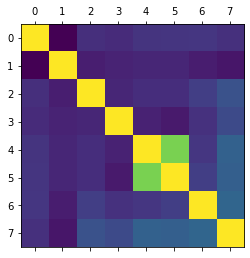

In [23]:
# create a correlation heath map
plt.matshow(sub_df_airbnb.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

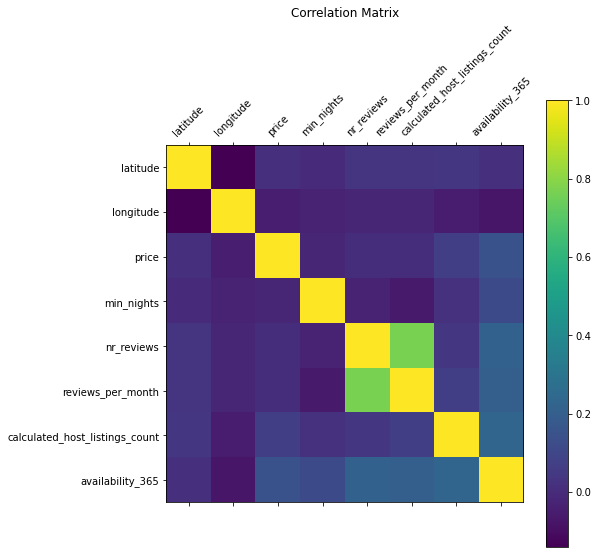

In [24]:
# define the correlation heat map
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(sub_df_airbnb.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub_df_airbnb.shape[1]), sub_df_airbnb.columns, fontsize=10, rotation=45) # x axis labels
plt.yticks(range(sub_df_airbnb.shape[1]), sub_df_airbnb.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=10) # add font size
plt.title('Correlation Matrix', fontsize=12) # add title

##### there is a strong correlation between the 'number_of_reviews' and 'reviews_per_month' as the reviews per month are derivated from the total amount of reviews. 

##### there is also some correlation between the 'availability_365' and the 'reviews', meaning that accomodation with a higher availability (more days per year) have a higher change to get reserved, so higher chance to be reviewed.

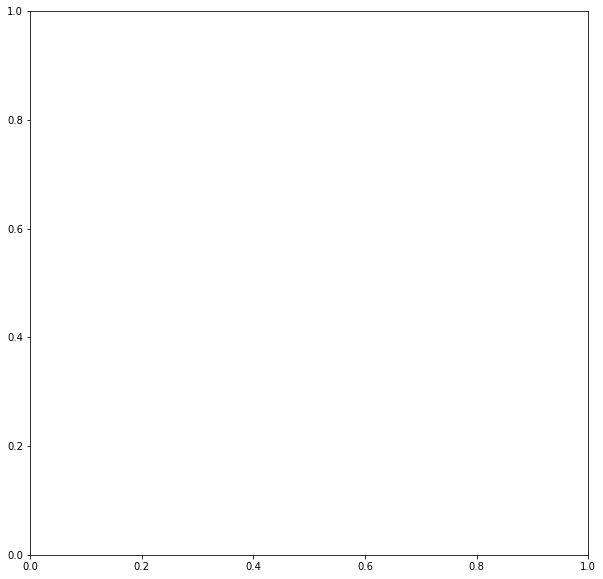

In [25]:
# Create an emtpty subplot with matplotlib. 

f,ax = plt.subplots(figsize=(10,10))

In [26]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

sub_df_airbnb.corr = sns.heatmap(sub_df_airbnb.corr(), annot = True, ax = ax) 

# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

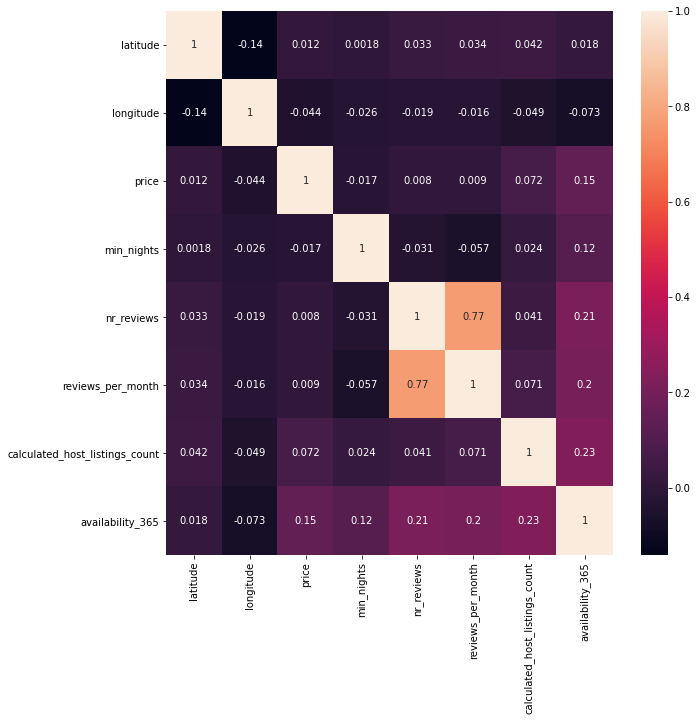

In [27]:
# heatmap into the correlation figure
sub_df_airbnb.corr.figure

##### the diagonal is a plot of a variable with itself so as expected the correlation coefficient is 1

##### the correlation coefficents confirm that there is a good correlation between 'number_of_reviews' and 'reviews_per_month'

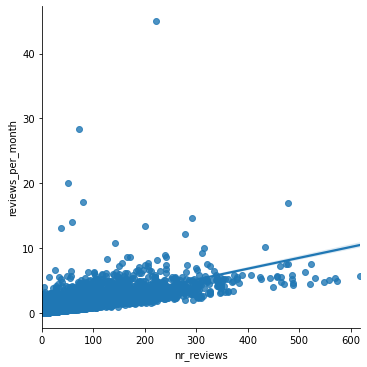

In [28]:
# creating a scatterplot for 'number_of_reviews' and 'reviews_per_month'
sns.lmplot(x = 'nr_reviews', y = 'reviews_per_month', data = sub_df_airbnb)

##### most of the reviews_per month are between 0 and 10, there is an outlier above 40, meaning that the host has either more than 1 listing (more than an accomodation shared on the platform) or some review where published at the same time.

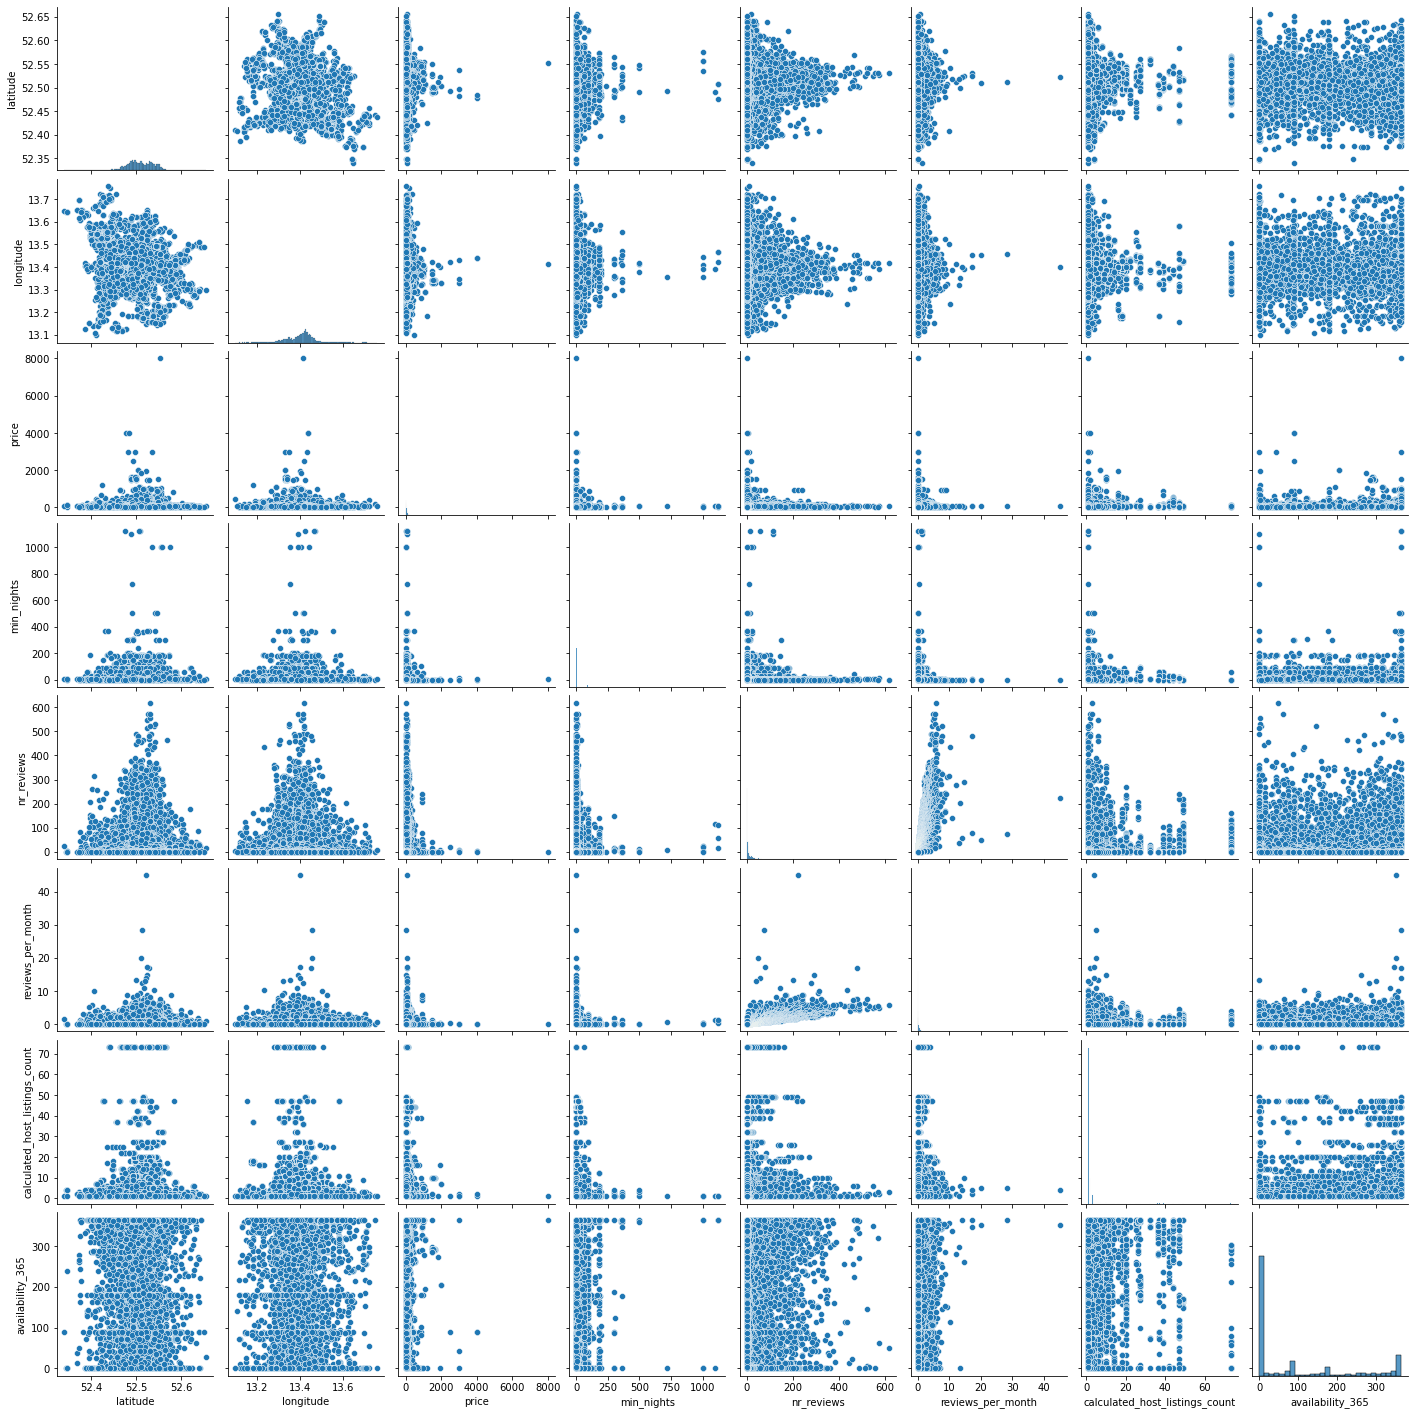

In [29]:
# Create a pair plot of the entire data set. (objects columns wont be considered)
g = sns.pairplot(sub_df_airbnb)

C:\Users\laune\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

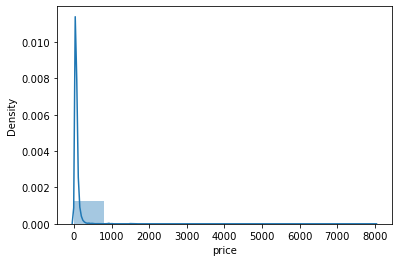

In [30]:
# Use a histogram to visualize the distribution of the variables
sns.distplot(sub_df_airbnb['price'], bins = 10)

In [31]:
# checking values 'price' column
df_airbnb['price'].max()

8000

In [32]:
df_airbnb['price'].min()

0

In [33]:
df_airbnb['price'].mean()

70.77893040588177

##### after checking the dataset on Excel, prices above 1000 euros per night are either expensive hotels or accomodation categories that do not reflect the Airbnb market. There are approx. 40 entries with a value higher than 1000 euro per night and from this 20 only a couple have been booked (most of them have no review). No review means that the accomodation is either new, never booked or possibly scam.

In [34]:
df_airbnb.shape

(19858, 17)

In [35]:
# dropping rows with a price per night higher than 1000 euros
df_airbnb_1 = df_airbnb.loc[(df_airbnb['price'] < 1000)]

In [36]:
df_airbnb_1.shape

(19815, 17)

In [37]:
df_airbnb_1.head()

,Unnamed: 0,id,name,host_id,host_name,area,district,latitude,longitude,room_type,price,min_nights,nr_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,1944,bright & airy Pberg/Mitte 3 months or more,2164,Lulah,Mitte,Brunnenstr. Nord,52.54425,13.39749,Private room,20,60,18,2018-11-11,0.20,3,251
1,1,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53454,13.40256,Entire home/apt,59,5,135,2021-02-12,2.24,6,173
2,2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53500,13.41758,Entire home/apt,90,62,147,2021-01-01,1.03,1,348
3,3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49885,13.34906,Private room,29,7,27,2019-05-31,0.29,1,364
4,4,6883,Stylish East Side Loft in Center with AC & 2 b...,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51171,13.45477,Entire home/apt,79,7,135,2021-01-23,1.00,1,0


In [38]:
df_airbnb_1['price'].max()

999

In [39]:
df_airbnb_1.shape

(19815, 17)

In [40]:
# dropping rows with a price per night higher than 1000 euros
df_airbnb_2 = df_airbnb_1.loc[(df_airbnb_1['price'] > 10)]

In [41]:
df_airbnb_2.shape

(19761, 17)

##### same check has been done for values lower than 10 euros, as most of the '0' prices are assigned to the same host (an hotel) with 0 review, meaning that the accomodation was never booked and probably used just as a holder. 54 entries have been removed

C:\Users\laune\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

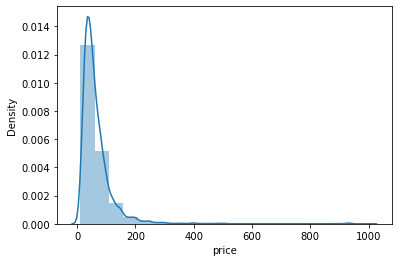

In [42]:
# Use a histogram to visualize the distribution of the variables
sns.distplot(df_airbnb_2['price'], bins = 20)

In [43]:
df_airbnb_2.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,min_nights,nr_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,19761.000000,1.976100e+04,1.976100e+04,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000,19761.000000
mean,9921.877739,2.427260e+07,8.899084e+07,52.510252,13.404453,67.031426,8.630940,22.005820,0.536768,3.146248,94.556298
std,5734.333931,1.419337e+07,1.027044e+08,0.031917,0.062215,66.990482,31.026241,48.131977,1.046122,7.656992,131.826471
min,0.000000,1.944000e+03,1.581000e+03,52.340410,13.098390,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,4954.000000,1.200488e+07,1.120904e+07,52.489850,13.368170,35.000000,2.000000,1.000000,0.030000,1.000000,0.000000
50%,9913.000000,2.316478e+07,4.235549e+07,52.509970,13.414000,50.000000,3.000000,4.000000,0.160000,1.000000,0.000000
75%,14889.000000,3.744583e+07,1.378403e+08,52.533090,13.438920,79.000000,5.000000,18.000000,0.560000,2.000000,178.000000
max,19857.000000,4.861566e+07,3.920622e+08,52.655980,13.757580,999.000000,1124.000000,618.000000,45.000000,73.000000,365.000000


In [44]:
# defining some price categories after excluding some outliers:
df_airbnb_2.loc[df_airbnb_2['price'] < 35, 'price category'] = 'low price'

C:\Users\laune\Anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\laune\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [45]:
df_airbnb_2.loc[(df_airbnb_2['price'] >= 35) & (df_airbnb_2['price'] < 100), 'price category'] = 'middle price'

C:\Users\laune\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [46]:
df_airbnb_2.loc[df_airbnb_2['price'] >= 100, 'price category'] = 'high price'

C:\Users\laune\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [47]:
df_airbnb_2['price category'].value_counts(dropna = False)

middle price    12143
low price        4689
high price       2929
Name: price category, dtype: int64

In [ ]:
# creating a categorical plot
sns.set(style="white")
g = sns.catplot(x="nr_reviews", y="price", hue="price category", data=df_airbnb_2)

In [ ]:
# creating a categorical plot
sns.set(style="ticks")
g = sns.catplot(x="min_nights", y="price", hue="price category", data=df_airbnb_2)

In [ ]:
# saving cleaned data set
df_airbnb_2.to_csv(os.path.join(path, 'Prepared Data','df_airbnb_v2_rev.csv'))